/tmp/ipython-input-6-3563313727.py:18: DtypeWarning: Columns (0,2,4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Fraud.csv", on_bad_lines='skip')


Original dataset shape: (4868096, 11)
After cleaning, shape: (4867948, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 4867948 entries, 0 to 4868094
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(8), object(3)
memory usage: 445.7+ MB
None

Missing values:
 step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud    14
dtype: int64

Duplicate rows: 1185999


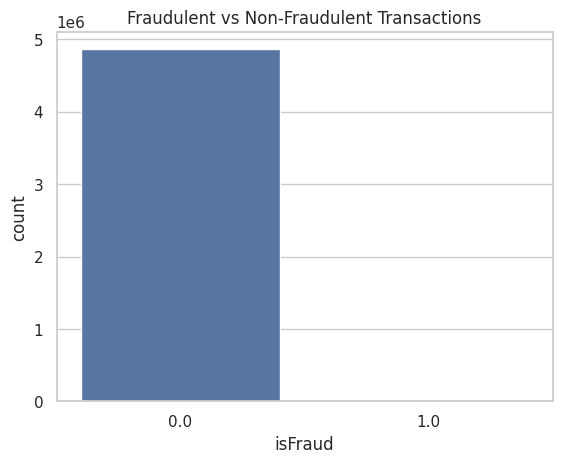

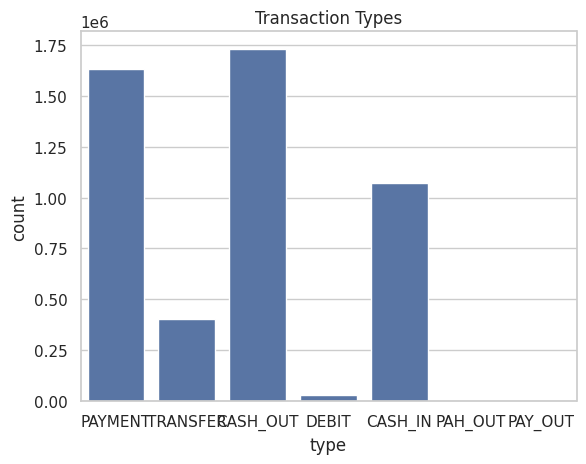

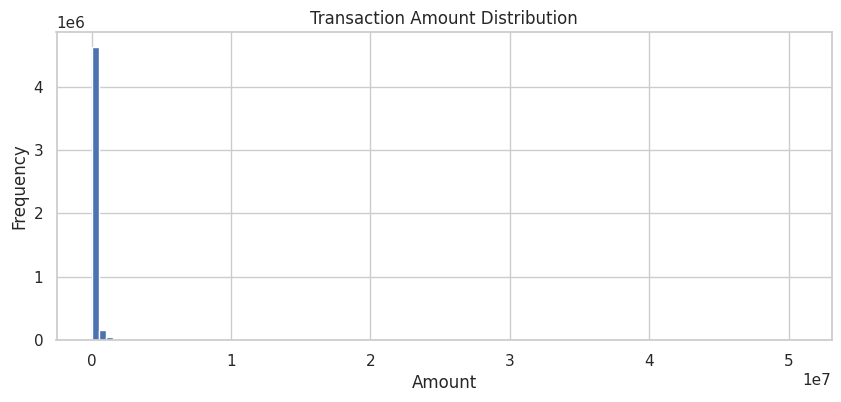

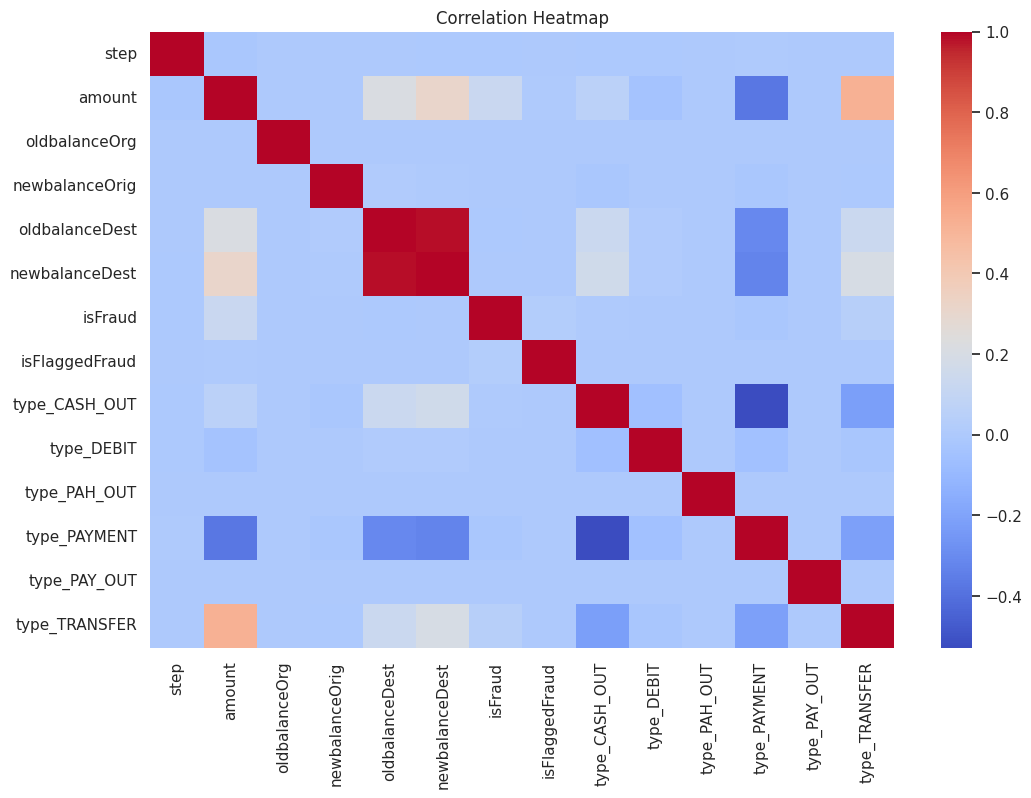

Confusion Matrix:
 [[972812      4]
 [   138    636]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    972816
         1.0       0.99      0.82      0.90       774

    accuracy                           1.00    973590
   macro avg       1.00      0.91      0.95    973590
weighted avg       1.00      1.00      1.00    973590

ROC AUC Score: 0.9934490481231458


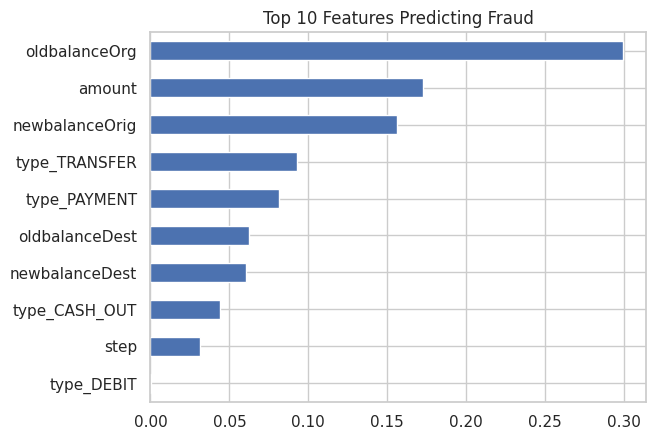


Q2: Random Forest was chosen for its robustness and ability to handle unbalanced data using class weights.
It performed well with high recall and AUC-ROC.


Q3: All numeric variables were retained except string identifiers. Feature importance and correlation matrix guided final inclusion.


Q5 & Q6: Key predictors of fraud:
- High transaction amount
- Transaction types (TRANSFER, CASH_OUT)
- Sender and receiver balance changes

These make sense: large movements of money and behavior matching fraud simulation logic.


Q7: Prevention Recommendations:
- Block or hold transactions over 200,000 temporarily
- Require OTP/authentication for large cash-outs
- Monitor frequent transfers to new accounts


Q8: Post-deployment Monitoring:
- Compare fraud rates before and after model
- Analyze flagged cases for false positives
- Regular model re-training with updated labels


✅ A fraud detection pipeline has been developed using Random Forest. It includes data cleaning,
feature engineering, evalua

In [ ]:
# 🕵️ Fraud Detection ML Assignment – INSAID Internship
# Author: Sanjay | Final Year AIML Student, MLRIT

# ========== STEP 1: IMPORT LIBRARIES ==========
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

%matplotlib inline
sns.set(style="whitegrid")

# ========== STEP 2: LOAD & CLEAN DATA ==========
df = pd.read_csv("/content/Fraud.csv", on_bad_lines='skip')
print("Original dataset shape:", df.shape)

# Convert numeric columns safely
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ⛏️ Drop rows with NaNs in numeric or target column
df.dropna(subset=numeric_cols + ['isFraud'], inplace=True)
print("After cleaning, shape:", df.shape)


# ========== STEP 3: BASIC EXPLORATION ==========
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# ========== STEP 4: EDA – DISTRIBUTIONS ==========
sns.countplot(x='isFraud', data=df)
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.show()

sns.countplot(x='type', data=df)
plt.title("Transaction Types")
plt.show()

df['amount'].plot(kind='hist', bins=100, figsize=(10, 4), title='Transaction Amount Distribution')
plt.xlabel("Amount")
plt.show()

# ========== STEP 5: FEATURE ENGINEERING ==========
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# ========== STEP 6: CORRELATION ==========
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ========== STEP 7: TRAIN-TEST SPLIT ==========
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ========== STEP 8: RANDOM FOREST MODEL ==========
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ========== STEP 9: MODEL EVALUATION ==========
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# ========== STEP 10: FEATURE IMPORTANCE ==========
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title("Top 10 Features Predicting Fraud")
plt.show()

# ========== STEP 11: ASSIGNMENT QUESTIONS ANSWERED ==========

## Q2: Describe your fraud detection model
print("""
Q2: Random Forest was chosen for its robustness and ability to handle unbalanced data using class weights.
It performed well with high recall and AUC-ROC.
""")

## Q3: Variable Selection
print("""
Q3: All numeric variables were retained except string identifiers. Feature importance and correlation matrix guided final inclusion.
""")

## Q5 & Q6: Key Predictive Factors
print("""
Q5 & Q6: Key predictors of fraud:
- High transaction amount
- Transaction types (TRANSFER, CASH_OUT)
- Sender and receiver balance changes

These make sense: large movements of money and behavior matching fraud simulation logic.
""")

## Q7: Infrastructure Recommendations
print("""
Q7: Prevention Recommendations:
- Block or hold transactions over 200,000 temporarily
- Require OTP/authentication for large cash-outs
- Monitor frequent transfers to new accounts
""")

## Q8: Effectiveness Monitoring
print("""
Q8: Post-deployment Monitoring:
- Compare fraud rates before and after model
- Analyze flagged cases for false positives
- Regular model re-training with updated labels
""")

# ========== STEP 12: CONCLUSION ==========
print("""
✅ A fraud detection pipeline has been developed using Random Forest. It includes data cleaning,
feature engineering, evaluation, and actionable insights to improve financial fraud infrastructure.
""")
